<a href="https://colab.research.google.com/github/MissSylviaSHI/Explorer/blob/main/test/Statistics%20related%20python/Week3/PMA_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
from google.colab import files
uploaded = files.upload()

In [21]:
import numpy as np
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

data = pd.read_excel('Used for test.xlsx', header=None)
# 为每一列添加标题
data.columns = ['fill', 'carbonation', 'line_speed']
column1_data = data['fill']
column2_data = data['carbonation']
column3_data = data['line_speed']
print(data)

import numpy as np
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

    fill  carbonation  line_speed
0    0.4         0.10         210
1    2.0         0.10         210
2    3.0         0.10         210
3    1.7         0.10         210
4    1.8         0.10         210
5    1.5         0.12         210
6    2.0         0.12         210
7    2.8         0.12         210
8    2.1         0.12         210
9    2.0         0.12         210
10   0.5         0.10         240
11   2.0         0.10         240
12   0.9         0.10         240
13   1.9         0.10         240
14   6.0         0.10         240
15   3.4         0.12         240
16   2.1         0.12         240
17   0.6         0.12         240
18   4.5         0.12         240
19   1.6         0.12         240
20   4.7         0.10         270
21   3.4         0.10         270
22   1.2         0.10         270
23   3.1         0.10         270
24   4.3         0.10         270
25   4.4         0.12         270
26   4.2         0.12         270
27   3.2         0.12         270
28   3.7      

In [22]:
def anova_interaction():

    # Determine the ANOVA with interaction
    formula = 'fill ~ C(carbonation) + C(line_speed) + C(carbonation):C(line_speed)'
    lm = ols(formula, data).fit()
    anovaResults = anova_lm(lm)
    # --- >>> STOP stats <<< ---
    print(anovaResults)

    return anovaResults['F'].iloc[0]

if __name__ == '__main__':
    anova_interaction()

                                df    sum_sq   mean_sq         F    PR(>F)
C(carbonation)                 1.0   0.81225  0.812250  0.549653  0.463866
C(line_speed)                  3.0  21.87475  7.291583  4.934247  0.006281
C(carbonation):C(line_speed)   3.0   0.03875  0.012917  0.008741  0.998854
Residual                      32.0  47.28800  1.477750       NaN       NaN


       linespeed
count  20.000000
mean    3.005000
std     1.125997
min     0.600000
25%     2.075000
50%     3.250000
75%     3.900000
max     4.500000
Box Plot Values:
Q1: 2.075, Q3: 3.9, IQR: 1.8249999999999997
Lower Bound for Outliers: -0.6624999999999996
Upper Bound for Outliers: 6.637499999999999

Rounded Number of classes: 5
class Range: 0.78


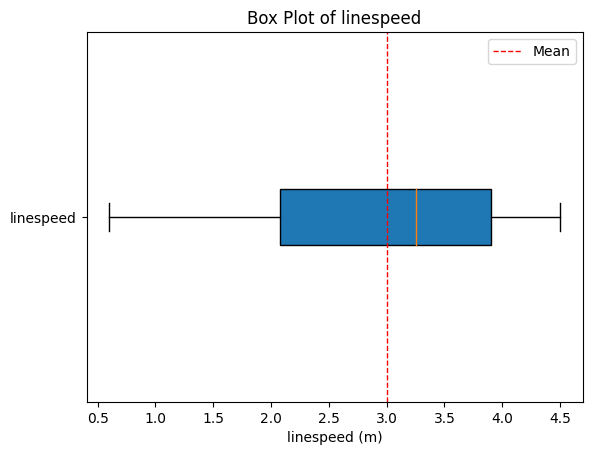

Classes:
   linespeed  Frequency
0       1.38          1
1       2.16          6
2       2.94          2
3       3.72          5
4       4.50          6 



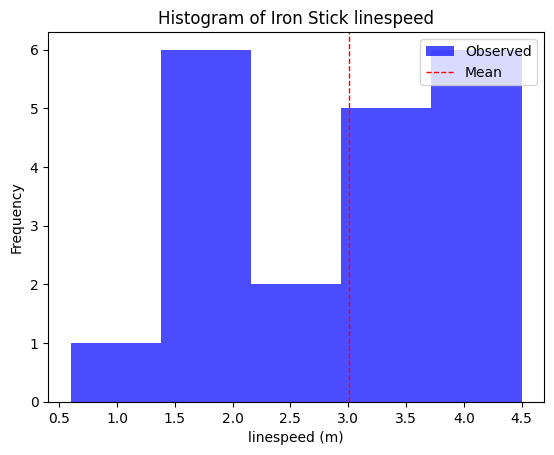

Chi-Square Table:
          χ^2
0    0.160997
1    2.881751
2    1.808239
3    0.008152
4    1.963835
Sum  6.822973
Number of classes (bins) using Sturges' formula: 5
Chi-square Statistic: 6.82297337073213, p-value: 0.049179777035176814


<ipython-input-30-2f9f90f13ced>:106: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_df = table_df.append(sum_row, ignore_index=True)


,CDF,Bin Frequency,Expected Value
0,0.074487,0.074487,1.489737
1,0.226493,0.152006,3.040122
2,0.476983,0.250490,5.009804
3,0.737284,0.260300,5.206007
4,0.907863,0.170580,3.411599
5,Sum =,0.907863,20.000000


In [30]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd

# Sample interval data
linespeed_data = np.array([1.5,2.0,2.8,2.1,2,3.4,2.1,0.6,4.5,1.6,4.4,4.2,3.2,3.7,2.9,4.3,3.3,4.2,3.8,3.5])
linespeed_df = pd.DataFrame(linespeed_data, columns=['linespeed'])
desc_stats = linespeed_df.describe()
print(desc_stats)

# Calculating the boundaries for outliers
Q1 = linespeed_df['linespeed'].quantile(0.25)
Q3 = linespeed_df['linespeed'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Displaying the results
print("Box Plot Values:")
print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Lower Bound for Outliers: {lower_bound}")
print(f"Upper Bound for Outliers: {upper_bound}\n")

# Calculate mean and standard dviation
mean = np.mean(linespeed_data)
std_dev = np.std(linespeed_data, ddof=1)

# Calculate Sturges' number of bins
n = len(linespeed_data)
k = int(1 + 3.322 * np.log10(n))
classrange=np.ptp(linespeed_data)/k
print("Rounded Number of classes:",k)
print("class Range:",classrange)
# Histogram and expected frequencies
hist, bin_edges = np.histogram(linespeed_data, bins=k)
cdf_values = stats.norm.cdf(bin_edges+classrange, mean, std_dev)

# Box plot
plt.boxplot(linespeed_data, vert=False, patch_artist=True)
plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.title('Box Plot of linespeed')
plt.xlabel('linespeed (m)')
plt.yticks([1], ['linespeed'])
plt.legend()
plt.show()

# Create a DataFrame for histogram data
hist_df = pd.DataFrame({'linespeed': bin_edges[:-1], 'Frequency': hist})

bin_frequencies = []
for i in range(0, len(cdf_values)-1):
    if i==0:
      frequency=cdf_values[0]
    else:
      frequency = cdf_values[i] - cdf_values[i - 1]
    bin_frequencies.append(frequency)
bin_frequencies= np.array(bin_frequencies)

# Expected values
expected_values = bin_frequencies * n

# Normalize expected frequencies
expected_frequencies_normalized = expected_values * (hist.sum() / expected_values.sum())

# Calculate chi-square values for each bin
chi_square_values = (hist - expected_values) ** 2 / expected_values
chi_square_df = pd.DataFrame({'χ^2': chi_square_values})
# Add a row for the sum of chi-square values
chi_square_df.loc['Sum'] = chi_square_df.sum()

# Chi-square goodness of fit test
chi_square_stat, p_value = stats.chisquare(hist, f_exp=expected_frequencies_normalized,ddof=2)
hist_df.linespeed=hist_df.linespeed+classrange
print("Classes:")
print(hist_df, "\n")
bin_centers = bin_edges[1:]

# Histogram
plt.hist(linespeed_data, bins = bin_edges, alpha=0.7, color='blue', label='Observed')
plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.title('Histogram of Iron Stick linespeed')
plt.xlabel('linespeed (m)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

print("Chi-Square Table:")
print(chi_square_df)

# Combined table of CDF, Bin Frequency, and Expected Value
table_df = pd.DataFrame({
    'CDF': cdf_values[:-1],  # Exclude the last CDF value which is always 1
    'Bin Frequency': bin_frequencies,
    'Expected Value': expected_values
})

# Add a 'Sum' row at the end of the DataFrame
sum_row = pd.DataFrame({
    'CDF': ['Sum ='],
    'Bin Frequency': [bin_frequencies.sum()],
    'Expected Value': [expected_frequencies_normalized.sum()]
})

# Append the sum row to the table
table_df = table_df.append(sum_row, ignore_index=True)

# Print the results
print(f"Number of classes (bins) using Sturges' formula: {k}")
print(f"Chi-square Statistic: {chi_square_values.sum()}, p-value: {p_value}")


# Display the table
table_df